## Import TensorFlow

In [1]:
import tensorflow as tf

In [3]:
print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.18.0


## Dataset
#### Import MNIST

In [8]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context


from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


### Shapes of Imported Arrays

In [9]:
print('x_train shape:', x_train.shape)
print('y_train shape:',y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:',y_test.shape)

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


## Plot an Image Example

In [17]:
%pip install matplotlib


  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 13.0 MB/s eta 0:00:00a 0:00:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 11.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 8.1 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


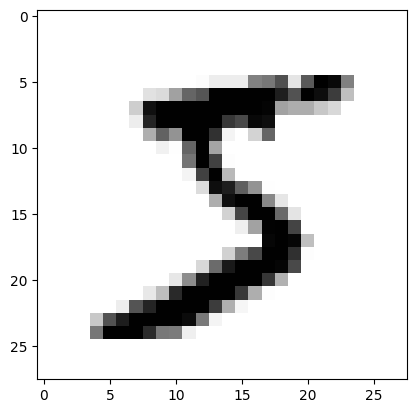

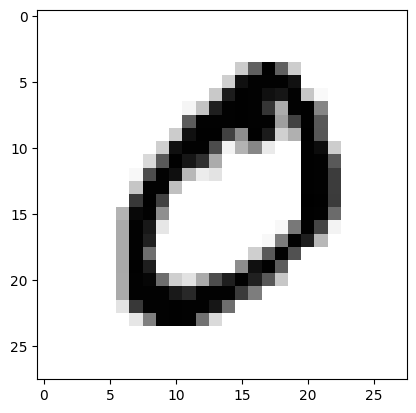

In [21]:
from matplotlib import pyplot as plt
%matplotlib inline  
# to ensure the plot remains within the notebook

plt.imshow(x_train[0], cmap='binary')  # reading the first training example
plt.show() # display the plot

plt.imshow(x_train[1], cmap='binary')  # reading the second training example
plt.show() # display the plot

## Display Labels

In [22]:
y_train[0]

np.uint8(5)

In [24]:
print(set(y_train))  # see classes of training set i.e. numbers 0-9

{np.uint8(0), np.uint8(1), np.uint8(2), np.uint8(3), np.uint8(4), np.uint8(5), np.uint8(6), np.uint8(7), np.uint8(8), np.uint8(9)}


# One Hot Encoding

#### After this encoding, every label will be converted to a list of 10 elements and the element at index to the corresponding class will be set to 1, rest will be set to 0:
eg. 5 (original label) will be set to the one-hot encoded label [0,0,0,0,0,1,0,0,0,0]

### Encoding Labels

In [25]:
from tensorflow.keras.utils import to_categorical

# encoding both train and test sets
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)


### Validated Shapes

In [27]:
# Turning each label (y_train_encoded) into a 10 dimenesional vector

print('y_train_encoded shape:', y_train_encoded.shape)
print('y_test_encoded shape:', y_test_encoded.shape)

y_train_encoded shape: (60000, 10)
y_test_encoded shape: (10000, 10)


### Display Encoded Labels

In [28]:
# Now, every number has a class i.e. a switch 1 or 0. This makes it a classification problem

y_train_encoded[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

# Task 4: Neural Networks

### Linear Equations
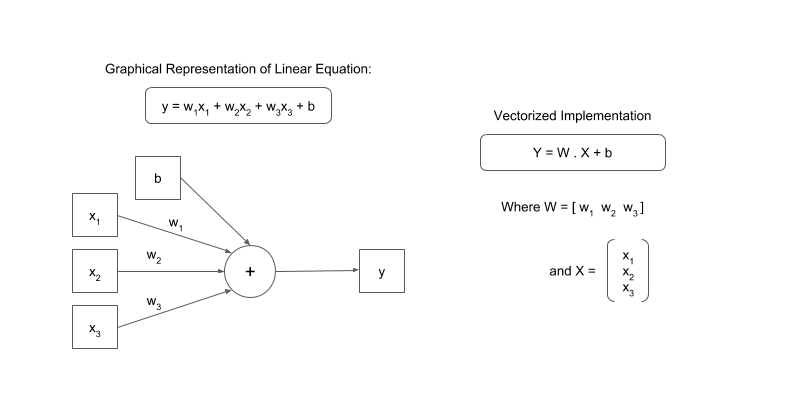

The above graph simply represents the equation:

\begin{equation}
y = w1 * x1 + w2 * x2 + w3 * x3 + b
\end{equation}

Where the `w1, w2, w3` are called the weights and `b` is an intercept term called bias. The equation can also be *vectorised* like this:

\begin{equation}
y = W . X + b
\end{equation}

Where `X = [x1, x2, x3]` and `W = [w1, w2, w3].T`. The .T means *transpose*. This is because we want the dot product to give us the result we want i.e. `w1 * x1 + w2 * x2 + w3 * x3`. This gives us the vectorised version of our linear equation.

A simple, linear approach to solving hand-written image classification problem - could it work?

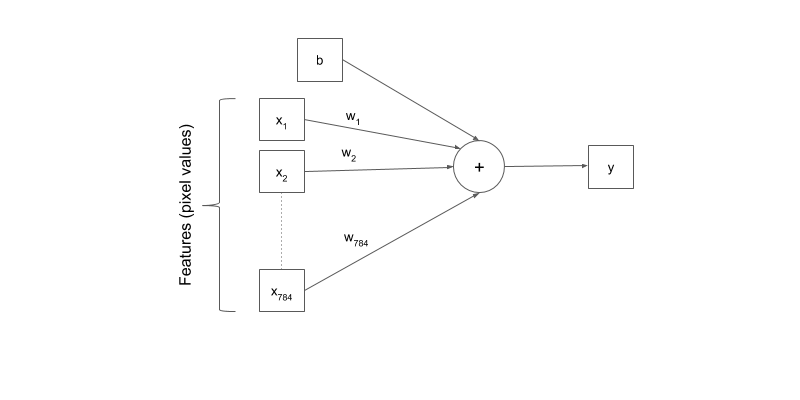

### Neural Networks
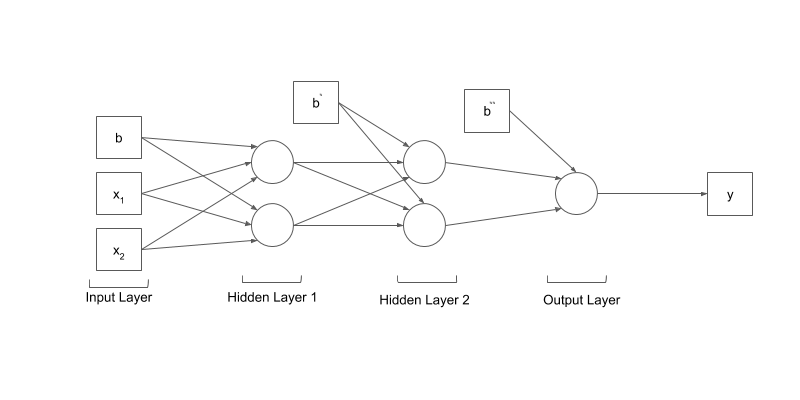
This model is much more likely to solve the problem as it can learn more complex function mapping for the inputs and outputs in our dataset.

## Preprocessing the Examples

#### Unrolling N-dimensional Arrays to Vectors

In [32]:
# shape : 28 * 28

# to convert to 784 * 1 shape

import numpy as np


In [37]:

x_train_reshaped = np.reshape(x_train, (60000, 784))
x_test_reshaped = np.reshape(x_test, (10000, 784))

print('x_train_reshaped shape:',x_train_reshaped.shape)
print('x_test_reshaped shape:',x_test_reshaped.shape)

x_train_reshaped shape: (60000, 784)
x_test_reshaped shape: (10000, 784)



#### Display Pixel Values


In [38]:
print(set(x_train_reshaped[0]))

{np.uint8(0), np.uint8(1), np.uint8(2), np.uint8(3), np.uint8(9), np.uint8(11), np.uint8(14), np.uint8(16), np.uint8(18), np.uint8(23), np.uint8(24), np.uint8(25), np.uint8(26), np.uint8(27), np.uint8(30), np.uint8(35), np.uint8(36), np.uint8(39), np.uint8(43), np.uint8(45), np.uint8(46), np.uint8(49), np.uint8(55), np.uint8(56), np.uint8(64), np.uint8(66), np.uint8(70), np.uint8(78), np.uint8(80), np.uint8(81), np.uint8(82), np.uint8(90), np.uint8(93), np.uint8(94), np.uint8(107), np.uint8(108), np.uint8(114), np.uint8(119), np.uint8(126), np.uint8(127), np.uint8(130), np.uint8(132), np.uint8(133), np.uint8(135), np.uint8(136), np.uint8(139), np.uint8(148), np.uint8(150), np.uint8(154), np.uint8(156), np.uint8(160), np.uint8(166), np.uint8(170), np.uint8(171), np.uint8(172), np.uint8(175), np.uint8(182), np.uint8(183), np.uint8(186), np.uint8(187), np.uint8(190), np.uint8(195), np.uint8(198), np.uint8(201), np.uint8(205), np.uint8(207), np.uint8(212), np.uint8(213), np.uint8(219), np.

### Data Normalization


In [40]:
x_mean = np.mean(x_train_reshaped)
x_std = np.std(x_train_reshaped)

# define a constant
epsilon = 1e-10

# normalize x_train
x_train_norm = (x_train_reshaped - x_mean) / (x_std + epsilon)

In [42]:
# normalizing x_test : 

x_test_norm = (x_test_reshaped - x_mean) / (x_std + epsilon)

### Display Normalized Pixel Values

In [44]:
print(set(x_train_norm[0]))  # after normalization, the training set's scale is shrunk down

{np.float64(-0.38589016215482896), np.float64(1.306921966983251), np.float64(1.17964285952926), np.float64(1.803310486053816), np.float64(1.6887592893452241), np.float64(2.8215433456857437), np.float64(2.719720059722551), np.float64(1.1923707702746593), np.float64(1.7396709323268205), np.float64(2.057868700961798), np.float64(2.3633385588513764), np.float64(2.096052433197995), np.float64(1.7651267538176187), np.float64(2.7960875241949457), np.float64(2.7451758812133495), np.float64(2.45243393406917), np.float64(0.02140298169794222), np.float64(-0.22042732246464067), np.float64(1.2305545025108566), np.float64(0.2759611966059242), np.float64(2.210603629906587), np.float64(2.6560805059955555), np.float64(2.6051688630139593), np.float64(-0.4240738943910262), np.float64(0.4668798577869107), np.float64(0.1486820891519332), np.float64(0.3905123933145161), np.float64(1.0905474843114664), np.float64(-0.09314821501064967), np.float64(1.4851127174188385), np.float64(2.7579037919587486), np.float6

## Creating a Model

#### Creating a model

In [45]:
#  import the sequential class
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


model = Sequential([
    # hidden layer 1 - 128 nodes of the input layer shape i.e. 784 dimensions or input features
    Dense(128, activation='relu', input_shape=(784,)),
    # hidden layer 2
    Dense(128, activation='relu'),
    # output layer
    Dense(10, activation='softmax')
])  

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Activation Functions

The first step in the node is the linear sum of the inputs:
\begin{equation}
Z = W . X + b
\end{equation}

The second step in the node is the activation function output:

\begin{equation}
A = f(Z)
\end{equation}

Graphical representation of a node where the two operations are performed:

![ReLU](images/1_5.png)

![image.png](attachment:image.png)

### Compiling the Model

#### Compiling the Model

In [46]:
model.compile(
    optimizer='sgd',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

## Training the Model

#### Training the model

In [47]:
model.fit(x_train_norm, y_train_encoded, epochs=3)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 448us/step - accuracy: 0.8141 - loss: 0.6198
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 450us/step - accuracy: 0.9428 - loss: 0.1981
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 449us/step - accuracy: 0.9565 - loss: 0.1472


#### Evaluating the model

In [48]:
# uses model, forward passes to compare on test set with encoded labels
loss, accuracy = model.evaluate(x_test_norm, y_test_encoded)

# to check if accuracy has memorized model
print('Test set accuracy:', accuracy*100)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step - accuracy: 0.9526 - loss: 0.1505
Test set accuracy: 96.02000117301941


## Predictions

#### Predictions on Test Set


In [49]:
# just want the predictions 
pred = model.predict(x_test_norm)
print('Shape of pred:', pred.shape)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step
Shape of pred: (10000, 10)


#### Plotting the results

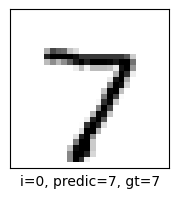

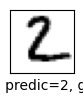

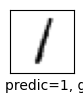

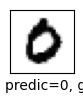

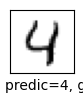

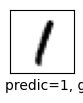

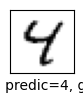

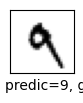

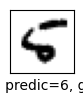

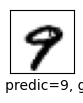

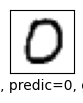

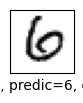

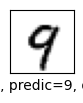

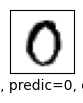

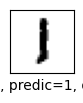

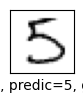

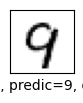

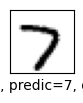

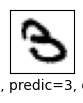

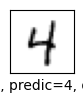

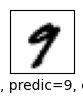

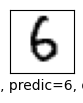

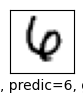

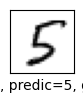

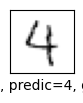

In [51]:
# plot few sets of images and their predictions
plt.figure(figsize=(12,12))

start_index = 0

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    predic = np.argmax(pred[start_index + i])
    #ground truth
    gt = y_test[start_index + i]
    col = 'g'

    if predic != gt:
        col = 'r'
    plt.xlabel('i={}, predic={}, gt={}'.format(start_index+i, predic, gt, color = col))
    plt.imshow(x_test[start_index+i], cmap='binary')  # to show exact pixels 28*255
    plt.show()

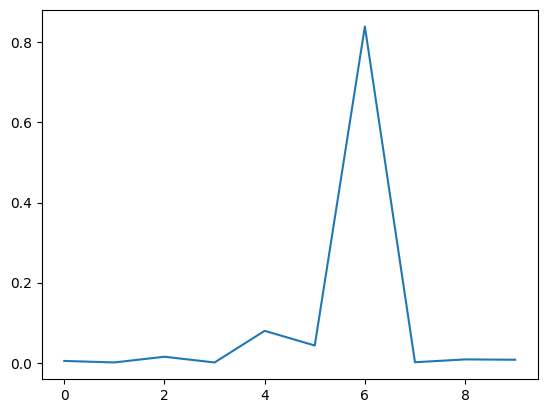

In [54]:
plt.plot(pred[8])
plt.show()



#softmax predictability outputs